# 03-05 : Time Series Analysis

referece: [Lecture 4: Pre-processing and advanced indexing](https://learn.london.ac.uk/mod/page/view.php?id=111306&forceview=1)

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection

### Functions

In [2]:
def set_category(dataframe:pd.DataFrame, column_name:str) -> None:
    """Set the specified column to be a category type."""
    dataframe[column_name] = dataframe[column_name].astype('category')

### Hellopter

In [3]:
# load the classified hellopeter data
df_hellopeter = pd.read_parquet('../../data/interim/01-06_human_classified.parquet')
df_hellopeter.set_index('id', inplace=True)

# show the data loaded
print(df_hellopeter.shape)
display(df_hellopeter.head(3))

(235, 16)


,created_at,review_rating,review_title,review_content,business_slug,chatbot_related,chatbot_evidence,chatbot_classification,chatbot_description,chatbot_suggestion,complaint_classification,complaint_service,complaint_description,complaint_suggestion,human_chatbot_classification,human_complaint_classification
id,,,,,,,,,,,,,,,,
3344640,2021-01-07 13:22:34,1,No option to speak to the agent on the custome...,Am not able to call vodacom to block my number...,vodacom,1,The customer mentioned that the Tobi bot canno...,Customer care assistance,The customer is complaining about not being ab...,Improve the chatbot's availability and provide...,Customer care,Vodacom,The customer is unable to call Vodacom to bloc...,Provide an option for customers to speak to an...,"limited functionality, unable to contact human...",blacklist
3347241,2021-01-10 11:32:59,1,"Airtime charged, but not credited to my phone",Bought Airtime online through the Vodacom App ...,vodacom,1,The customer mentioned trying to chat with TOB...,Customer service,The customer complained about being thrown out...,Improve the stability of the chatbot to preven...,Billing,Airtime,The customer bought airtime online but it was ...,Investigate the issue and credit the airtime t...,"technical error, unable to contact human agent",missing airtime
3353838,2021-01-15 11:32:11,1,Chatbot Tobi/ Voice Bundle,I am disappointed at how your service has beco...,vodacom,1,The complaint mentions the introduction of a c...,Limited functionality,The chatbot has made it impossible for custome...,Improve the chatbot's capabilities to handle a...,Service issue,Voice Bundle,Failed to load voice bundle but debited the cu...,Load the customer's voice bundle or reimburse ...,"limited functionality, unable to contact human...",voice bundle


In [4]:
df_hellopeter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 3344640 to 4522620
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   created_at                      235 non-null    datetime64[ns]
 1   review_rating                   235 non-null    int64         
 2   review_title                    235 non-null    object        
 3   review_content                  235 non-null    object        
 4   business_slug                   235 non-null    object        
 5   chatbot_related                 235 non-null    int64         
 6   chatbot_evidence                235 non-null    object        
 7   chatbot_classification          235 non-null    object        
 8   chatbot_description             235 non-null    object        
 9   chatbot_suggestion              235 non-null    object        
 10  complaint_classification        235 non-null    object        
 11  c

In [5]:
def set_hellopeter_categorical(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Set the datatype for all categorical columns"""
    df_result = dataframe.copy()

    set_category(df_result, 'business_slug')
    set_category(df_result, 'chatbot_classification')
    set_category(df_result, 'complaint_classification')
    set_category(df_result, 'complaint_service')
    set_category(df_result, 'human_chatbot_classification')
    set_category(df_result, 'human_complaint_classification')

    return df_result

# set the categorical columns
df_hellopeter = set_hellopeter_categorical(df_hellopeter)
df_hellopeter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 3344640 to 4522620
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   created_at                      235 non-null    datetime64[ns]
 1   review_rating                   235 non-null    int64         
 2   review_title                    235 non-null    object        
 3   review_content                  235 non-null    object        
 4   business_slug                   235 non-null    category      
 5   chatbot_related                 235 non-null    int64         
 6   chatbot_evidence                235 non-null    object        
 7   chatbot_classification          235 non-null    category      
 8   chatbot_description             235 non-null    object        
 9   chatbot_suggestion              235 non-null    object        
 10  complaint_classification        235 non-null    category      
 11  c

In [6]:
def set_hellopeter_boolean(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Update the datatype of boolean columns"""
    df_result = dataframe.copy()
    df_result['chatbot_related'] = df_result['chatbot_related'].astype('bool')

    return df_result

# set the boolean columns
df_hellopeter = set_hellopeter_boolean(df_hellopeter)
df_hellopeter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 3344640 to 4522620
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   created_at                      235 non-null    datetime64[ns]
 1   review_rating                   235 non-null    int64         
 2   review_title                    235 non-null    object        
 3   review_content                  235 non-null    object        
 4   business_slug                   235 non-null    category      
 5   chatbot_related                 235 non-null    bool          
 6   chatbot_evidence                235 non-null    object        
 7   chatbot_classification          235 non-null    category      
 8   chatbot_description             235 non-null    object        
 9   chatbot_suggestion              235 non-null    object        
 10  complaint_classification        235 non-null    category      
 11  c

### Hellopeter Aspect Based Sentiment Analysis data

In [7]:
# load the hellopeter aspect based sentiment analysis data
df_hellopeter_absa = pd.read_parquet('../../data/interim/01-07_quadruples.parquet')

print(df_hellopeter_absa.shape)
display(df_hellopeter_absa.head())

(283, 5)


,aspect,polarity,opinion,category,id
0,customer care line,negative,NULL,SUPPORT#GENERAL,3344640
1,service Vodacom,negative,bad,SUPPORT#GENERAL,3347241
2,service,negative,limited,SERVICE#GENERAL,3353838
3,chatbot Tobi,negative,disappointed,SERVICE#GENERAL,3353838
4,vodacom,negative,daft,SUPPORT#GENERAL,3358601


In [8]:
def set_hellopeter_absa_categorical(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Set the datatype for all categorical columns"""
    df_result = dataframe.copy()

    set_category(df_result, 'aspect')
    set_category(df_result, 'polarity')
    set_category(df_result, 'opinion')
    set_category(df_result, 'category')

    return df_result

# set the categorical columns
df_hellopeter_absa = set_hellopeter_absa_categorical(df_hellopeter_absa)
df_hellopeter_absa.info()

display(df_hellopeter_absa.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   aspect    283 non-null    category
 1   polarity  283 non-null    category
 2   opinion   283 non-null    category
 3   category  283 non-null    category
 4   id        283 non-null    int64   
dtypes: category(4), int64(1)
memory usage: 15.0 KB


,aspect,polarity,opinion,category,id
0,customer care line,negative,NULL,SUPPORT#GENERAL,3344640
1,service Vodacom,negative,bad,SUPPORT#GENERAL,3347241
2,service,negative,limited,SERVICE#GENERAL,3353838
3,chatbot Tobi,negative,disappointed,SERVICE#GENERAL,3353838
4,vodacom,negative,daft,SUPPORT#GENERAL,3358601


#### Data Perpetration

In [12]:
df_hellopeter_merged = pd.merge(df_hellopeter, df_hellopeter_absa, on='id', how='left')

#### Data Analysis

**Descriptive Statistics**: Start by getting a sense of the data distribution.

In [13]:
print(df_hellopeter_merged.describe())

                 id                     created_at  review_rating
count  2.830000e+02                            283     283.000000
mean   3.916997e+06  2022-04-23 14:21:48.056537088       1.084806
min    3.344640e+06            2021-01-07 13:22:34       1.000000
25%    3.659636e+06     2021-10-08 00:32:38.500000       1.000000
50%    3.889782e+06            2022-04-12 08:10:17       1.000000
75%    4.186290e+06            2022-11-19 14:39:53       1.000000
max    4.522620e+06            2023-07-20 15:05:44       5.000000
std    3.219509e+05                            NaN       0.468757


**Aspect Frequency**: Check which aspects are mentioned most frequently.

In [14]:
hellopeter_aspect_counts = df_hellopeter_merged['aspect'].value_counts()
print(hellopeter_aspect_counts)

aspect
service                                              33
Vodacom                                              18
customer service                                     17
vodacom                                              12
customer care                                         5
                                                     ..
Vodacom customer services                             1
Vodacom does not care                                 1
Vodacom is not a brand to be trusted or relied on     1
Vodacom number                                        1
webmail7                                              1
Name: count, Length: 170, dtype: int64


**Sentiment Distribution**: Check the distribution of sentiments across all feedback.

In [15]:
hellopeter_sentiment_counts = df_hellopeter_merged['polarity'].value_counts()
print(hellopeter_sentiment_counts)

polarity
negative    273
              5
positive      5
Name: count, dtype: int64


#### Data Visualization

Aspect Frequency Bar Chart

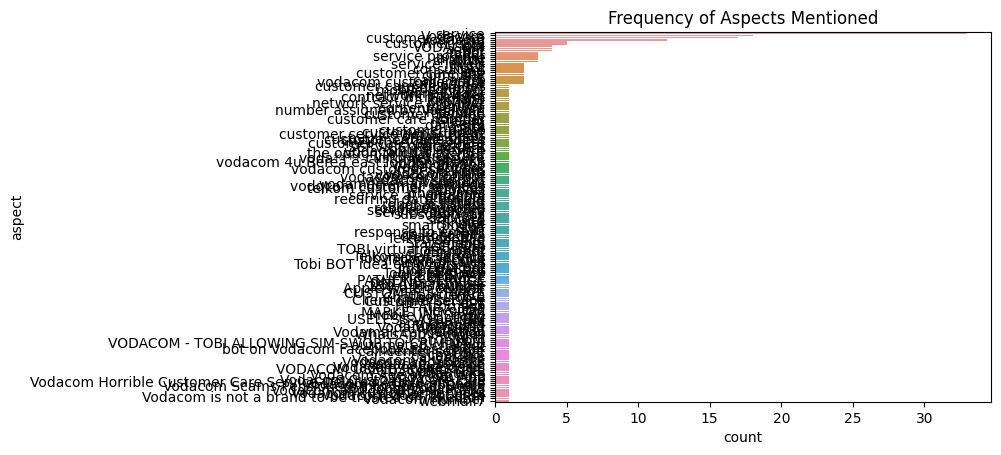

In [17]:
sns.countplot(data=df_hellopeter_merged, y='aspect', order=df_hellopeter_merged['aspect'].value_counts().index)
plt.title('Frequency of Aspects Mentioned')
plt.show()

Sentiment Distribution Pie Chart

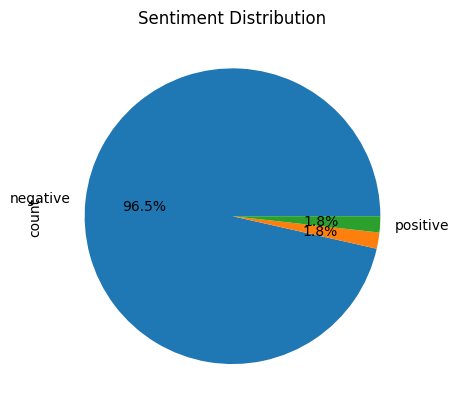

In [18]:
hellopeter_sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

Aspect-wise Sentiment Distribution

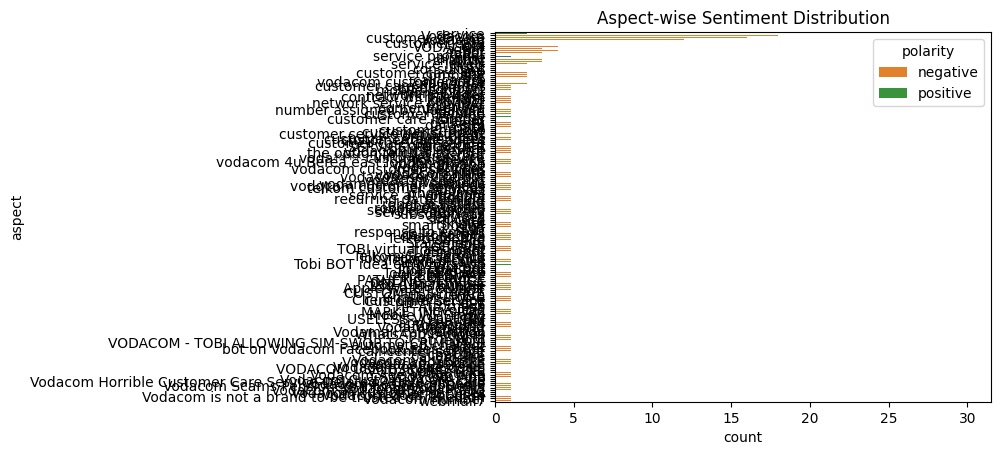

In [19]:
sns.countplot(data=df_hellopeter_merged, y='aspect', hue='polarity', order=df_hellopeter_merged['aspect'].value_counts().index)
plt.title('Aspect-wise Sentiment Distribution')
plt.show()

Review Rating Distribution

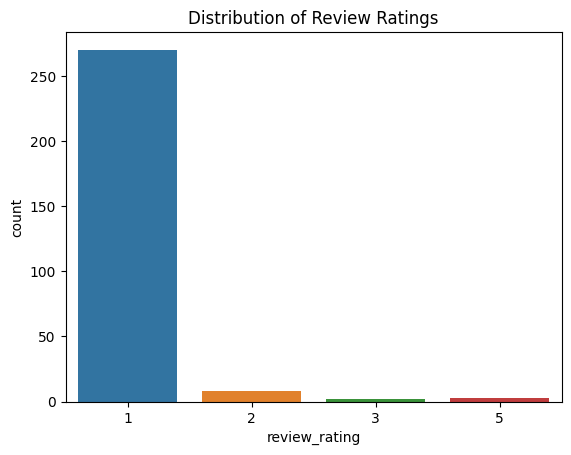

In [20]:
sns.countplot(data=df_hellopeter_merged, x='review_rating')
plt.title('Distribution of Review Ratings')
plt.show()

#### Advanced Analysis

Average Review Rating by Aspect

In [29]:
avg_rating_by_aspect = df_hellopeter_merged.groupby('aspect')['review_rating'].mean().sort_values(ascending=False)
print(avg_rating_by_aspect)

aspect
energy                                               5.0
Tobi BOT idea on WhatsApp                            5.0
WhatsApp bundles                                     3.0
response to emails                                   2.0
eSim                                                 2.0
                                                    ... 
Vodacom does not care                                1.0
Vodacom is not a brand to be trusted or relied on    1.0
Vodacom number                                       1.0
Vodacom online deals                                 1.0
webmail7                                             1.0
Name: review_rating, Length: 170, dtype: float64


#### Aspect and Category

In [50]:
df_hellopeter_merged.category.value_counts()

category
SUPPORT#GENERAL                   132
SERVICE#GENERAL                    65
SOFTWARE#GENERAL                   20
SOFTWARE#OPERATION_PERFORMANCE     17
COMPANY#GENERAL                    15
LAPTOP#GENERAL                      9
LAPTOP#OPERATION_PERFORMANCE        5
SCAM#GENERAL                        4
PORTS#GENERAL                       3
SCAM                                3
                                    1
SMS#GENERAL                         1
SOFTWARE#USABILITY                  1
SCAMMER#GENERAL                     1
SIM_CARD#GENERAL                    1
SHIPPING#GENERAL                    1
CARD#GENERAL                        1
POWER_SUPPLY#GENERAL                1
COMplaints#GENERAL                  1
SUPPORT#QUALITY                     1
Name: count, dtype: int64

In [54]:
df_hellopeter_merged.aspect.value_counts().to_csv('../../data/interim/03-04_hellopeter_aspect_counts.csv')

In [48]:
categories = df_hellopeter_merged \
    .groupby(['category', 'aspect'])['id'] \
    .count() \
    .reset_index() \
    .rename(columns={'id': 'count'}) \
    .sort_values(['category', 'count'], ascending=[True, False])

display(categories)

# save the categories
categories.to_csv('../../data/interim/03-04_hellopeter_categories.csv')


,category,aspect,count
73,,agent,1
0,,'SERVICE' PROVIDER,0
1,,****** chat bot,0
2,,082 135 number,0
3,,250.0 MB bundle,0
...,...,...,...
3395,SUPPORT#QUALITY,vodacom support,0
3396,SUPPORT#QUALITY,vodacum,0
3397,SUPPORT#QUALITY,vodamail email settings,0
3398,SUPPORT#QUALITY,vodqcom customer services,0


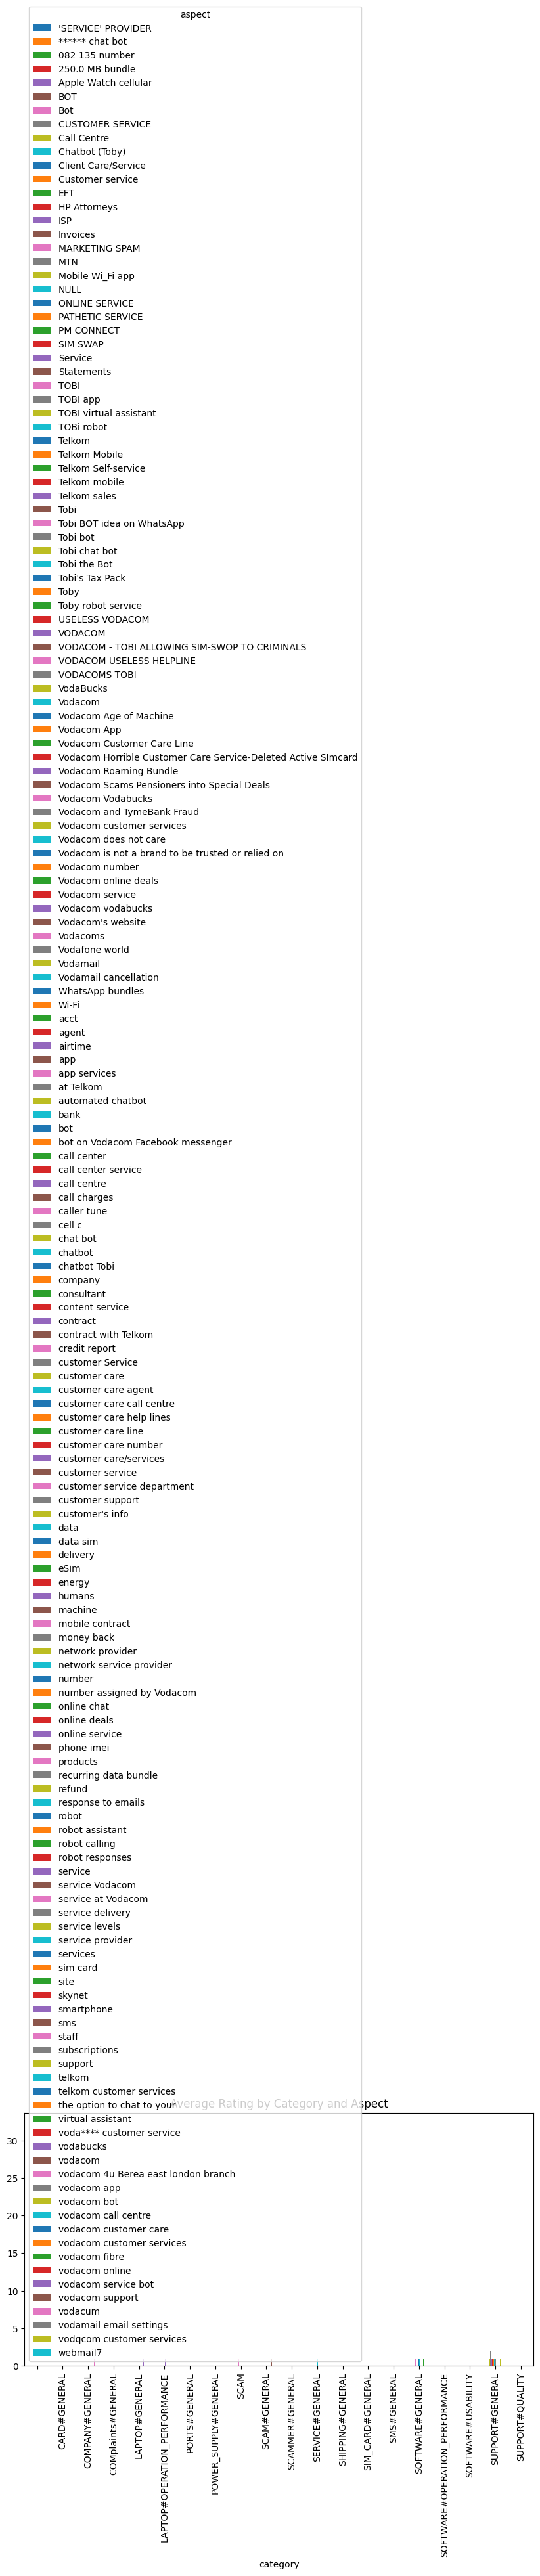

In [46]:
df_hellopeter_merged \
    .groupby(['category', 'aspect'])['id'] \
    .count() \
    .unstack() \
    .plot(kind='bar', figsize=(10, 5))
plt.title('Average Rating by Category and Aspect')
plt.show()
